In [2]:
import numpy as np # NumPy (Numerical Python) is a powerful Python library for numerical computing
import pandas as pd #read the datsets
import statsmodels.api as sm #contain linear regression.
from scipy import stats #use for statics
from sklearn.datasets import fetch_openml #import datsets
import matplotlib.pyplot as plt #use for ploting graph


In [3]:
# Download the Boston dataset
boston = fetch_openml(data_id=531, parser='auto')

# Access the data and target variables
data = boston.data  # Predictor variables
target = boston.target  # Target variable (median house values)
feature_names = boston.feature_names  # Names of the predictor variables

# Convert the data to a pandas DataFrame (optional)
df = pd.DataFrame(data, columns=feature_names)
df['medv'] = target


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# prdicting medv using 'lstat'
X = df['LSTAT']  # Predictor variable
y = df['medv']   # Target variable

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X) #ols means ordinary least square regression
lm_fit = model.fit()


In [6]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.08e-88
Time:                        15:23:54   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
print("Attribute names:")
for attr in dir(lm_fit):
    print(attr)


Attribute names:
HC0_se
HC1_se
HC2_se
HC3_se
_HCCM
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_abat_diagonal
_cache
_data_attr
_data_in_cache
_get_robustcov_results
_is_nested
_use_t
_wexog_singular_values
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
info_criteria
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncent

In [8]:
r2_score = lm_fit.rsquared
print("R-squared:", r2_score)


R-squared: 0.5441462975864797


In [9]:


y_pred = lm_fit.predict(X)
mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error:", mse)


Mean Squared Error: 38.48296722989415


In [10]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 6.20346413142642


In [11]:
#parameters of line.
coefficients = lm_fit.params
print("Coefficients:")
print(coefficients)


Coefficients:
const    34.553841
LSTAT    -0.950049
dtype: float64


In [12]:
lm_fit.conf_int()

,0,1
const,33.448457,35.659225
LSTAT,-1.026148,-0.873951


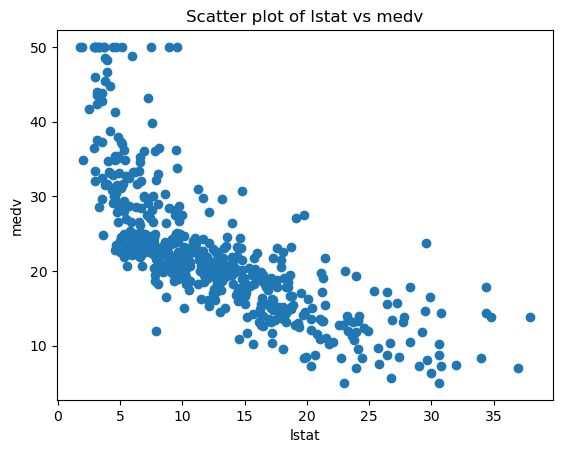

In [13]:


# Plotting 'lstat' vs 'medv'
plt.scatter(df['LSTAT'], df['medv'])
plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Scatter plot of lstat vs medv')
plt.show()


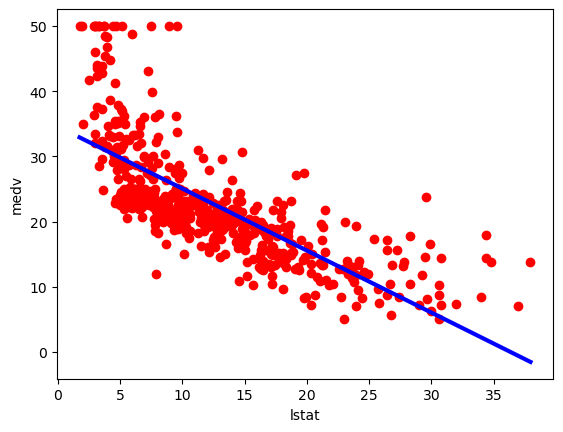

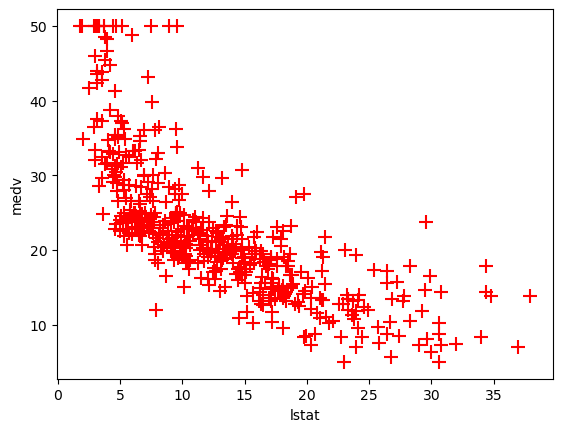

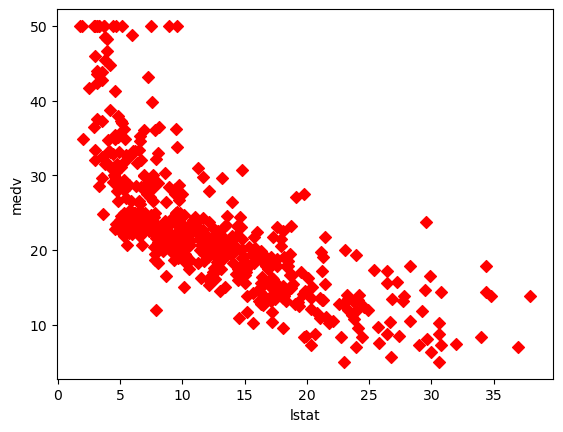

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of 'lstat' vs 'medv'
plt.scatter(df['LSTAT'], df['medv'], color='red', marker='o')
plt.xlabel('lstat')
plt.ylabel('medv')

# Add an abline (linear regression line) to the plot
x = np.linspace(min(df['LSTAT']), max(df['LSTAT']), 100)
y = lm_fit.params[0] + lm_fit.params[1] * x
plt.plot(x, y, color='blue', linewidth=3)

# Display the plot
plt.show()

# Create a scatter plot of 'lstat' vs 'medv' with different marker shapes
plt.scatter(df['LSTAT'], df['medv'], color='red', marker='+', s=100)
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# Create a scatter plot of 'lstat' vs 'medv' with different marker types
markers = [str(i) for i in range(1, 21)]
plt.scatter(df['LSTAT'], df['medv'], color='red', marker='D')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()


In [15]:
# Predict 'medv' for 'lstat' = 5
lstat_value = 9.14
predicted_medv = lm_fit.predict([1, lstat_value])

print(predicted_medv)


[25.87038979]


In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


multiple linear regression

In [27]:
X = df.iloc[:, :5].drop('CHAS', axis=1) # droping chas column cz giving inavalid output
y = df['medv']

# Drop rows with missing values
X = X.dropna()
y = y.dropna()

# Add a constant column for the intercept
X = sm.add_constant(X)

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     52.25
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           8.71e-37
Time:                        15:31:57   Log-Likelihood:                -1752.0
No. Observations:                 506   AIC:                             3514.
Df Residuals:                     501   BIC:                             3535.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.8500      2.279     12.658      0.0

ValueError: x and y must be the same size

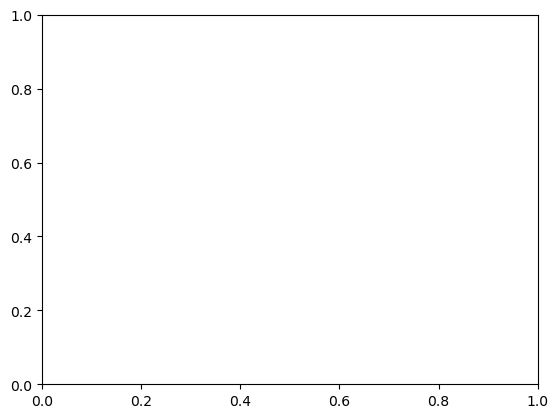

In [60]:
# Create a scatter plot of 'lstat' vs 'medv'
plt.scatter(df.iloc[:, :5].drop('CHAS', axis=1), df['medv'], color='red', marker='o')
plt.xlabel('lstat')
plt.ylabel('medv')

# # Add an abline (linear regression line) to the plot
# x = np.linspace(min(df['LSTAT']), max(df['LSTAT']), 100)
# y = lm_fit.params[0] + lm_fit.params[1] * x
# plt.plot(x, y, color='blue', linewidth=3)

# # Display the plot
# plt.show()

# # Create a scatter plot of 'lstat' vs 'medv' with different marker shapes
# plt.scatter(df['LSTAT'], df['medv'], color='red', marker='+', s=100)
# plt.xlabel('lstat')
# plt.ylabel('medv')
# plt.show()

# # Create a scatter plot of 'lstat' vs 'medv' with different marker types
# markers = [str(i) for i in range(1, 21)]
# plt.scatter(df['LSTAT'], df['medv'], color='red', marker='D')
# plt.xlabel('lstat')
# plt.ylabel('medv')
plt.show()

Non-linear Transformations of the Predictors.

In [57]:
#creating new data frame
df['lstat2']=df['LSTAT']**3

In [58]:


# Define the predictor variables
X = df[['LSTAT', 'lstat2']]
X = sm.add_constant(X)  # Add a constant column for the intercept

# Define the response variable
y = df['medv']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     418.5
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          9.61e-108
Time:                        16:06:23   Log-Likelihood:                -1592.4
No. Observations:                 506   AIC:                             3191.
Df Residuals:                     503   BIC:                             3203.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8703      0.723     55.113      0.0

In [59]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 6.20346413142642
